# FAIRe Qualitäts-KPIs
Autor: Elias Rausch  
Datum:24.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie schwer ist mein Fahrzeug, was kostet es und wie lässt sich dies verbessern?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Das erste Fahrzeug soll den Anforderungen der Aufgabenstellung entsprechen.



### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


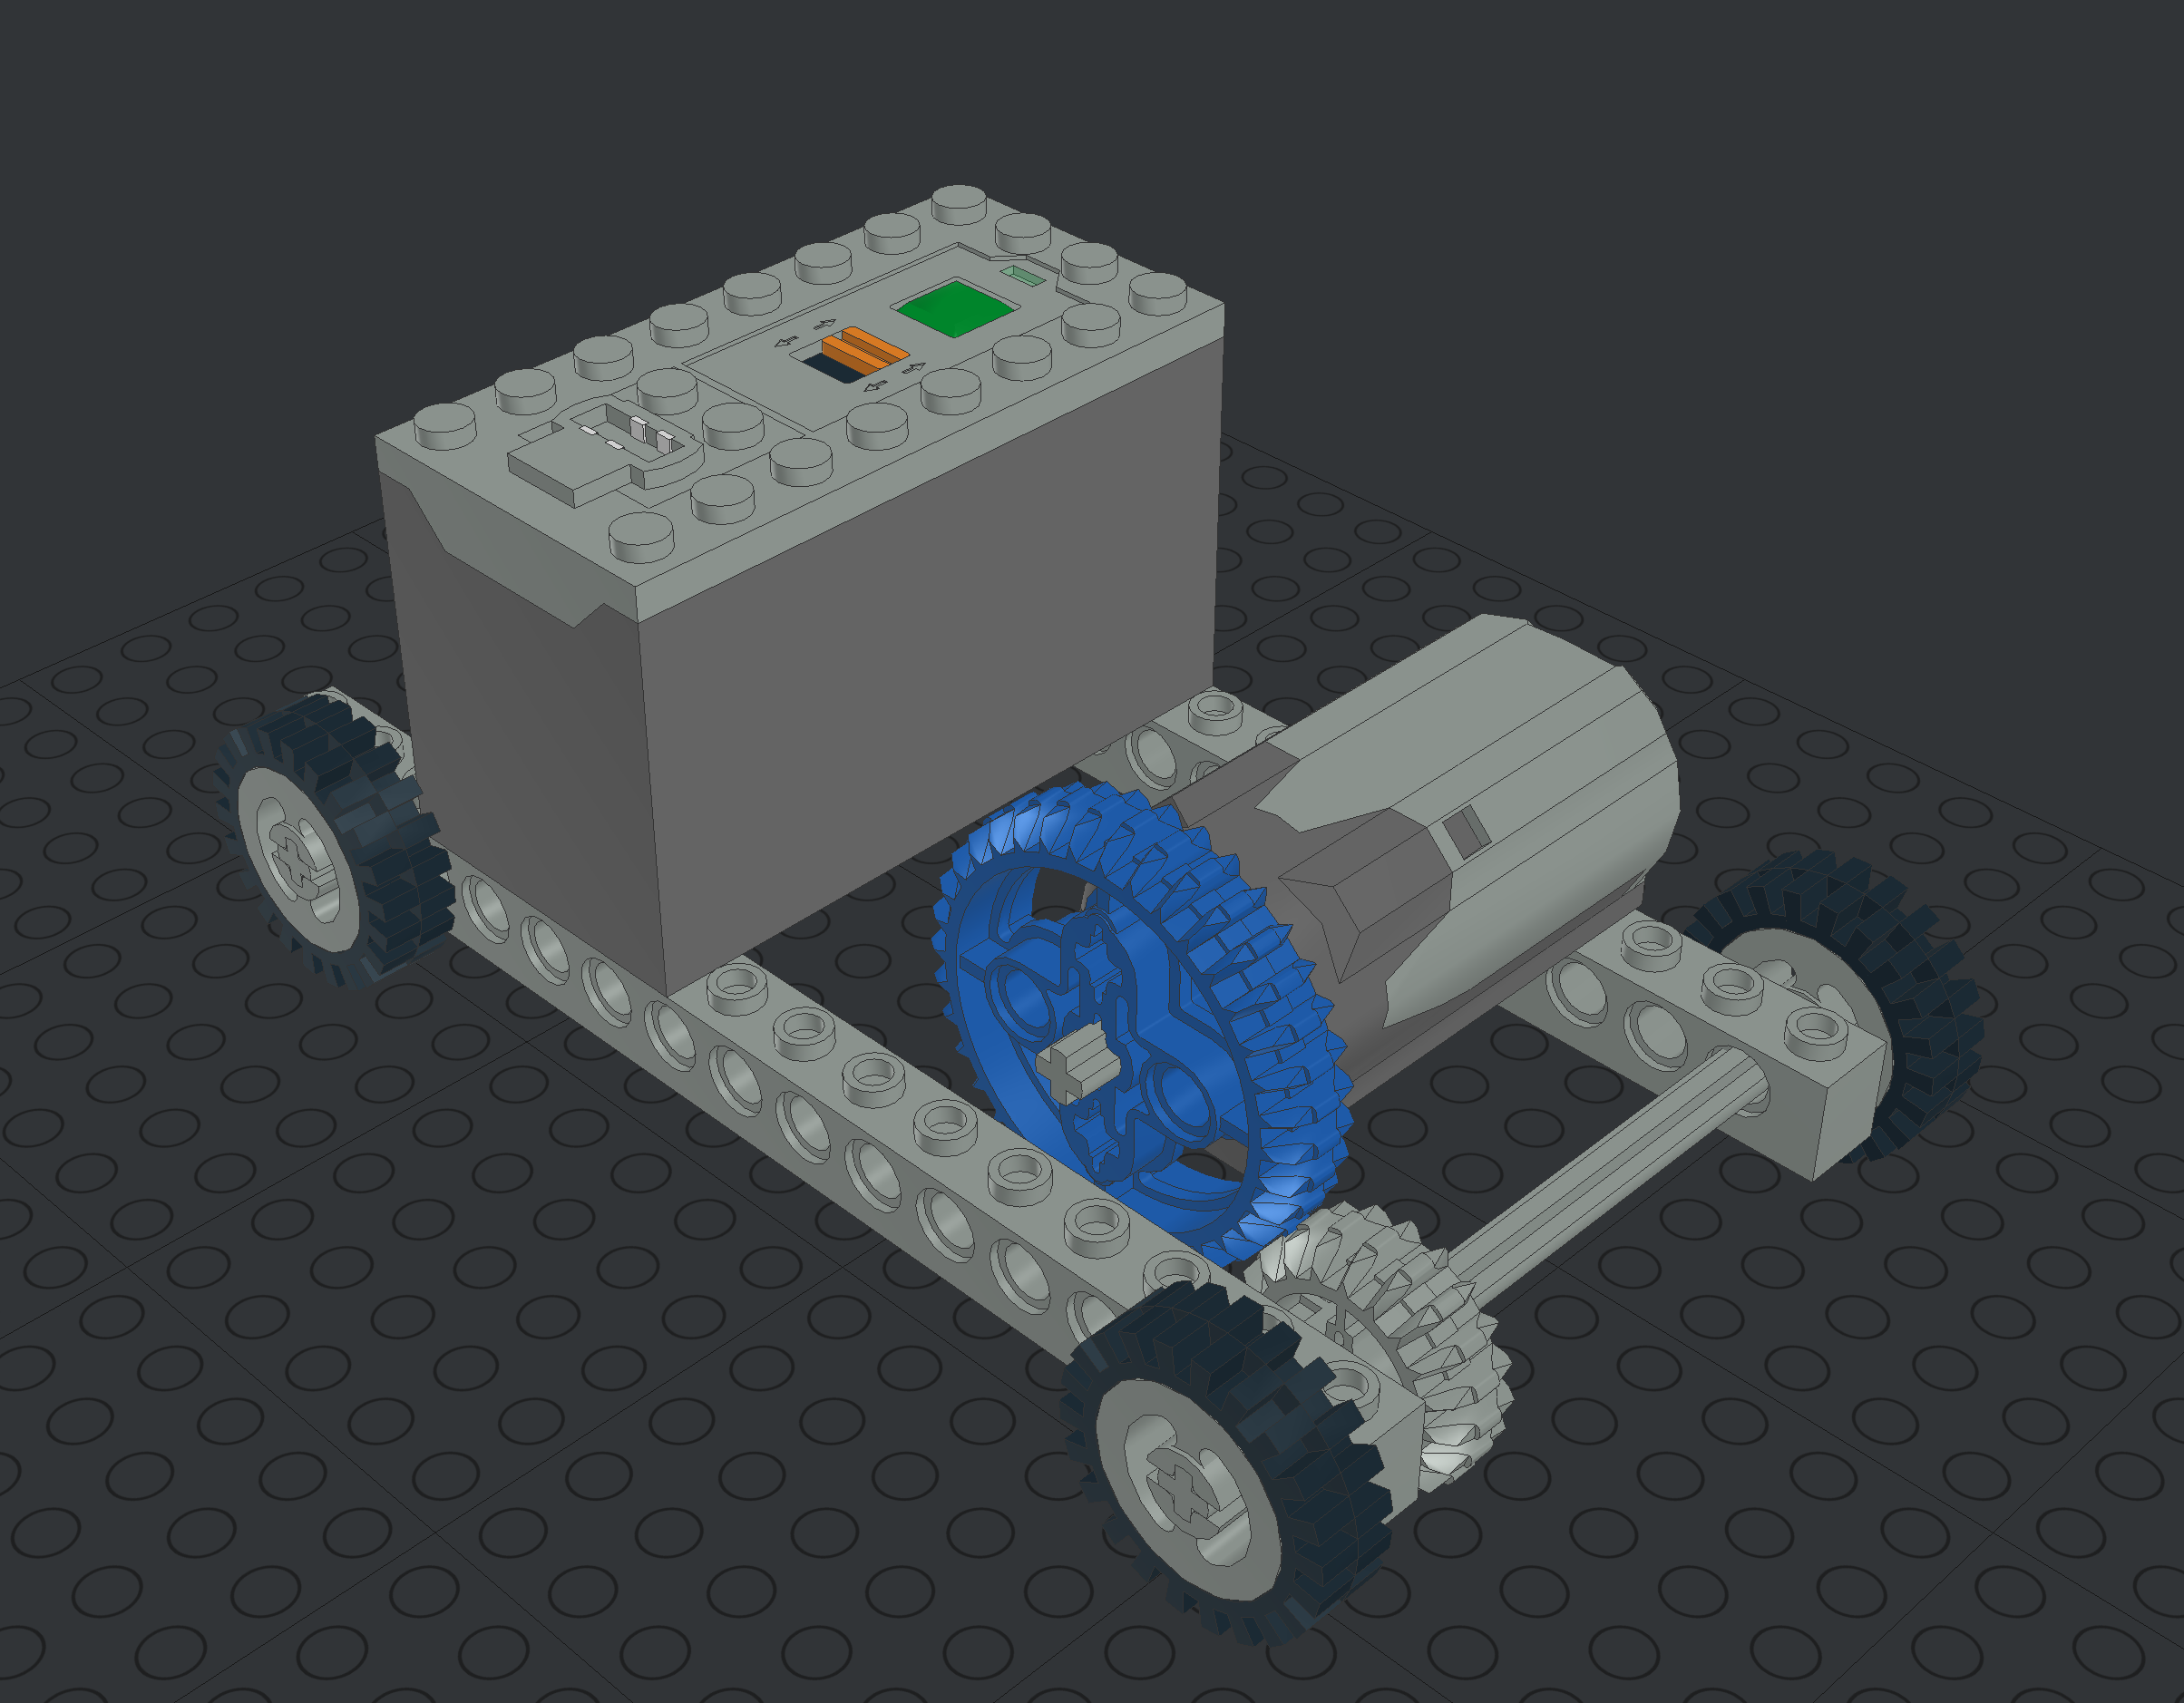

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Vier Räder, zwei achsen, bewegt von einem Motor mit zahnrädern, zusammengehalten von zwei langen teilen und einem Akku.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [17]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

# Importing all modules one by one to provide an overview
# The next commented line would provide the same result in one line
# from functions.classes import *
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

# When you are writing code yourself later, you might want to copy
# these imports to avoid rerunning the full notebook after restart

In [18]:
# initialize components
#Create the wheels and axles as single components
#create first axle
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
print(axles["3737"])
front_axle = LegoComponent("front axle", axles["3737"])
print(front_axle.properties["label"])
front_axle.properties["color"] = "grey"

# Create the second axle
back_axle = LegoComponent()
back_axle.properties["label"] = "back axle"
back_axle.properties.update(axles["3737"])

back_axle.properties["color"] = "grey"
pprint.pprint(back_axle.properties)

#Create wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_wheel_right = LegoComponent("front wheel right", wheels["3482c01"])
pprint.pprint(front_wheel_right.properties)

# We included a clone function to both Lego classes, so you can easily
# create duplicate objects. Passing the new label is optional
back_wheel_right = front_wheel_right.clone("back wheel right")
back_wheel_left = front_wheel_right.clone("back wheel left")
front_wheel_left = front_wheel_right.clone("front wheel left")

#create electric
with open("datasheets/motors.json") as json_file:
    electric = json.load(json_file)
    
engine = LegoComponent("engine", electric["8883-1"])
pprint.pprint(engine.properties)
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
battery = LegoComponent("battery", batteries["88000-1"])
pprint.pprint(battery.properties)

#technic
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
    
frame_right = LegoComponent("frame_right", frame["3703"])
pprint.pprint(frame_right.properties)
frame_left = frame_right.clone("frame_left")

with open("datasheets/gears.json") as json_file:
    gear = json.load(json_file)
gear_axle = LegoComponent("gear_axle", gear["32269"])
pprint.pprint(gear_axle.properties)
gear_engine = LegoComponent("gear_engine", gear["32498"], {"color":"blue"})
pprint.pprint(gear_engine.properties)
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
axle_engine = LegoComponent("axle_engine", axles["32073"])
pprint.pprint(axle_engine.properties)

{'item number': 3737, 'item description': 'Axle 10 studs', 'category': 'axle', 'price [Euro]': 0.01, 'mass [g]': 1.49, 'delivery time [days]': 7, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3737#T=S&O={%22iconly%22:0}', 'dimension [studs]': 10}
front axle
{'category': 'axle',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3737#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 10,
 'item description': 'Axle 10 studs',
 'item number': 3737,
 'label': 'back axle',
 'mass [g]': 1.49,
 'price [Euro]': 0.01}
{'category': 'wheel',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3482c01#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 24.0,
 'item description': 'wheel 24',
 'item number': '3482c01',
 'label': 'front wheel right',
 'mass [g]': 3.0,
 'price [Euro]': 0.01,
 'related items': 3483}
{'category': 'motor',
 'compatible battery': '8881, 8878, 45517, 88000',
 'dat

In [19]:
# set properties

In [20]:
# aggregate components
#front_wheel
front_wheel_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "front wheel assembly", assembly_method="stick together like lego blocks")
front_wheel_assembly.add([front_wheel_right, gear_axle, front_axle, front_wheel_left])
#back_wheel
back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel assembly"
    )
back_wheel_assembly.add([back_wheel_right, back_axle, back_wheel_left])
#chasis
chasis_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "chasis assembly"
    )
chasis_assembly.add([frame_right, front_wheel_assembly, back_wheel_assembly, frame_left])
#gear
gear_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "gear assembly"
    )
gear_assembly.add([axle_engine, gear_engine])
#drivetrain
drivetrain_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "drivetrain assembly"
    )
drivetrain_assembly.add([gear_assembly, engine])

#assembly
car = LegoAssembly(
    AggregationLayer.SYSTEM,
    "scooter",
    manufacturer="FST",
    comment="Faster! Harder! Car!",
)
car.add([chasis_assembly, drivetrain_assembly, battery])
print(car.get_component_list())

[LegoComponent battery [0aa0acdd-5c4b-4ddc-a02c-451af8cc875c], LegoComponent frame_right [6850b575-5aa2-41ef-9934-5ec7163f9a36], LegoComponent frame_left [3c5716c5-a33a-45a4-a29c-54b483191356], LegoComponent front wheel right [0dcfc47f-eedf-424e-96c1-7181a58cfde0], LegoComponent gear_axle [1c62d083-a7a1-4e90-af4e-f9461ed9bf65], LegoComponent front axle [44c1a8bd-bce4-40b9-a049-3bdddde8ffd0], LegoComponent front wheel left [caea1f5a-7fa7-42e5-84fe-242d5a73d821], LegoComponent back wheel right [1746a672-2252-49b3-9067-44d703f5023f], LegoComponent back axle [9b6deffb-de5d-4ee6-9418-97ffd5851b68], LegoComponent back wheel left [1abec486-80a1-46c0-8de6-a8f8534dccef], LegoComponent engine [85541dac-b101-4560-ac7c-a64eb75c1ece], LegoComponent axle_engine [f7be380c-cbf0-49ea-8d4e-44d5213caad7], LegoComponent gear_engine [3975e271-d93f-4a1b-b60d-3007fb505d4e]]


### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [21]:
# calculate the KPIs for your car
calculation_rules.test_function()
#calculate KPIs
total_mass = calculation_rules.kpi_mass(car)
print("Gesamtmasse: ", total_mass, "g")
car.properties["mass [g]"] = total_mass

total_price = calculation_rules.kpi_price(car)
print("Gesamtpreis: ", total_price, "Euro")
car.properties["price [Euro]"] = total_price

total_delivery_time = calculation_rules.kpi_delivery_time(car)
print("Lieferzeit ", total_delivery_time, "Tage")
car.properties["delivery time [days]"] = total_delivery_time

You called the test function.
Gesamtmasse:  164.52 g
Gesamtpreis:  51.44100000000001 Euro
Lieferzeit  13 Tage


In [22]:
# print your KPIs

Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [23]:
# export car and its properties
with open("car.json", "w") as fp:
    json.dump(car.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Am besten lassen sich Gewicht und Preis reduzieren. Die Lieferzeit lässt sich nur schwer im Design beeinflussen.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

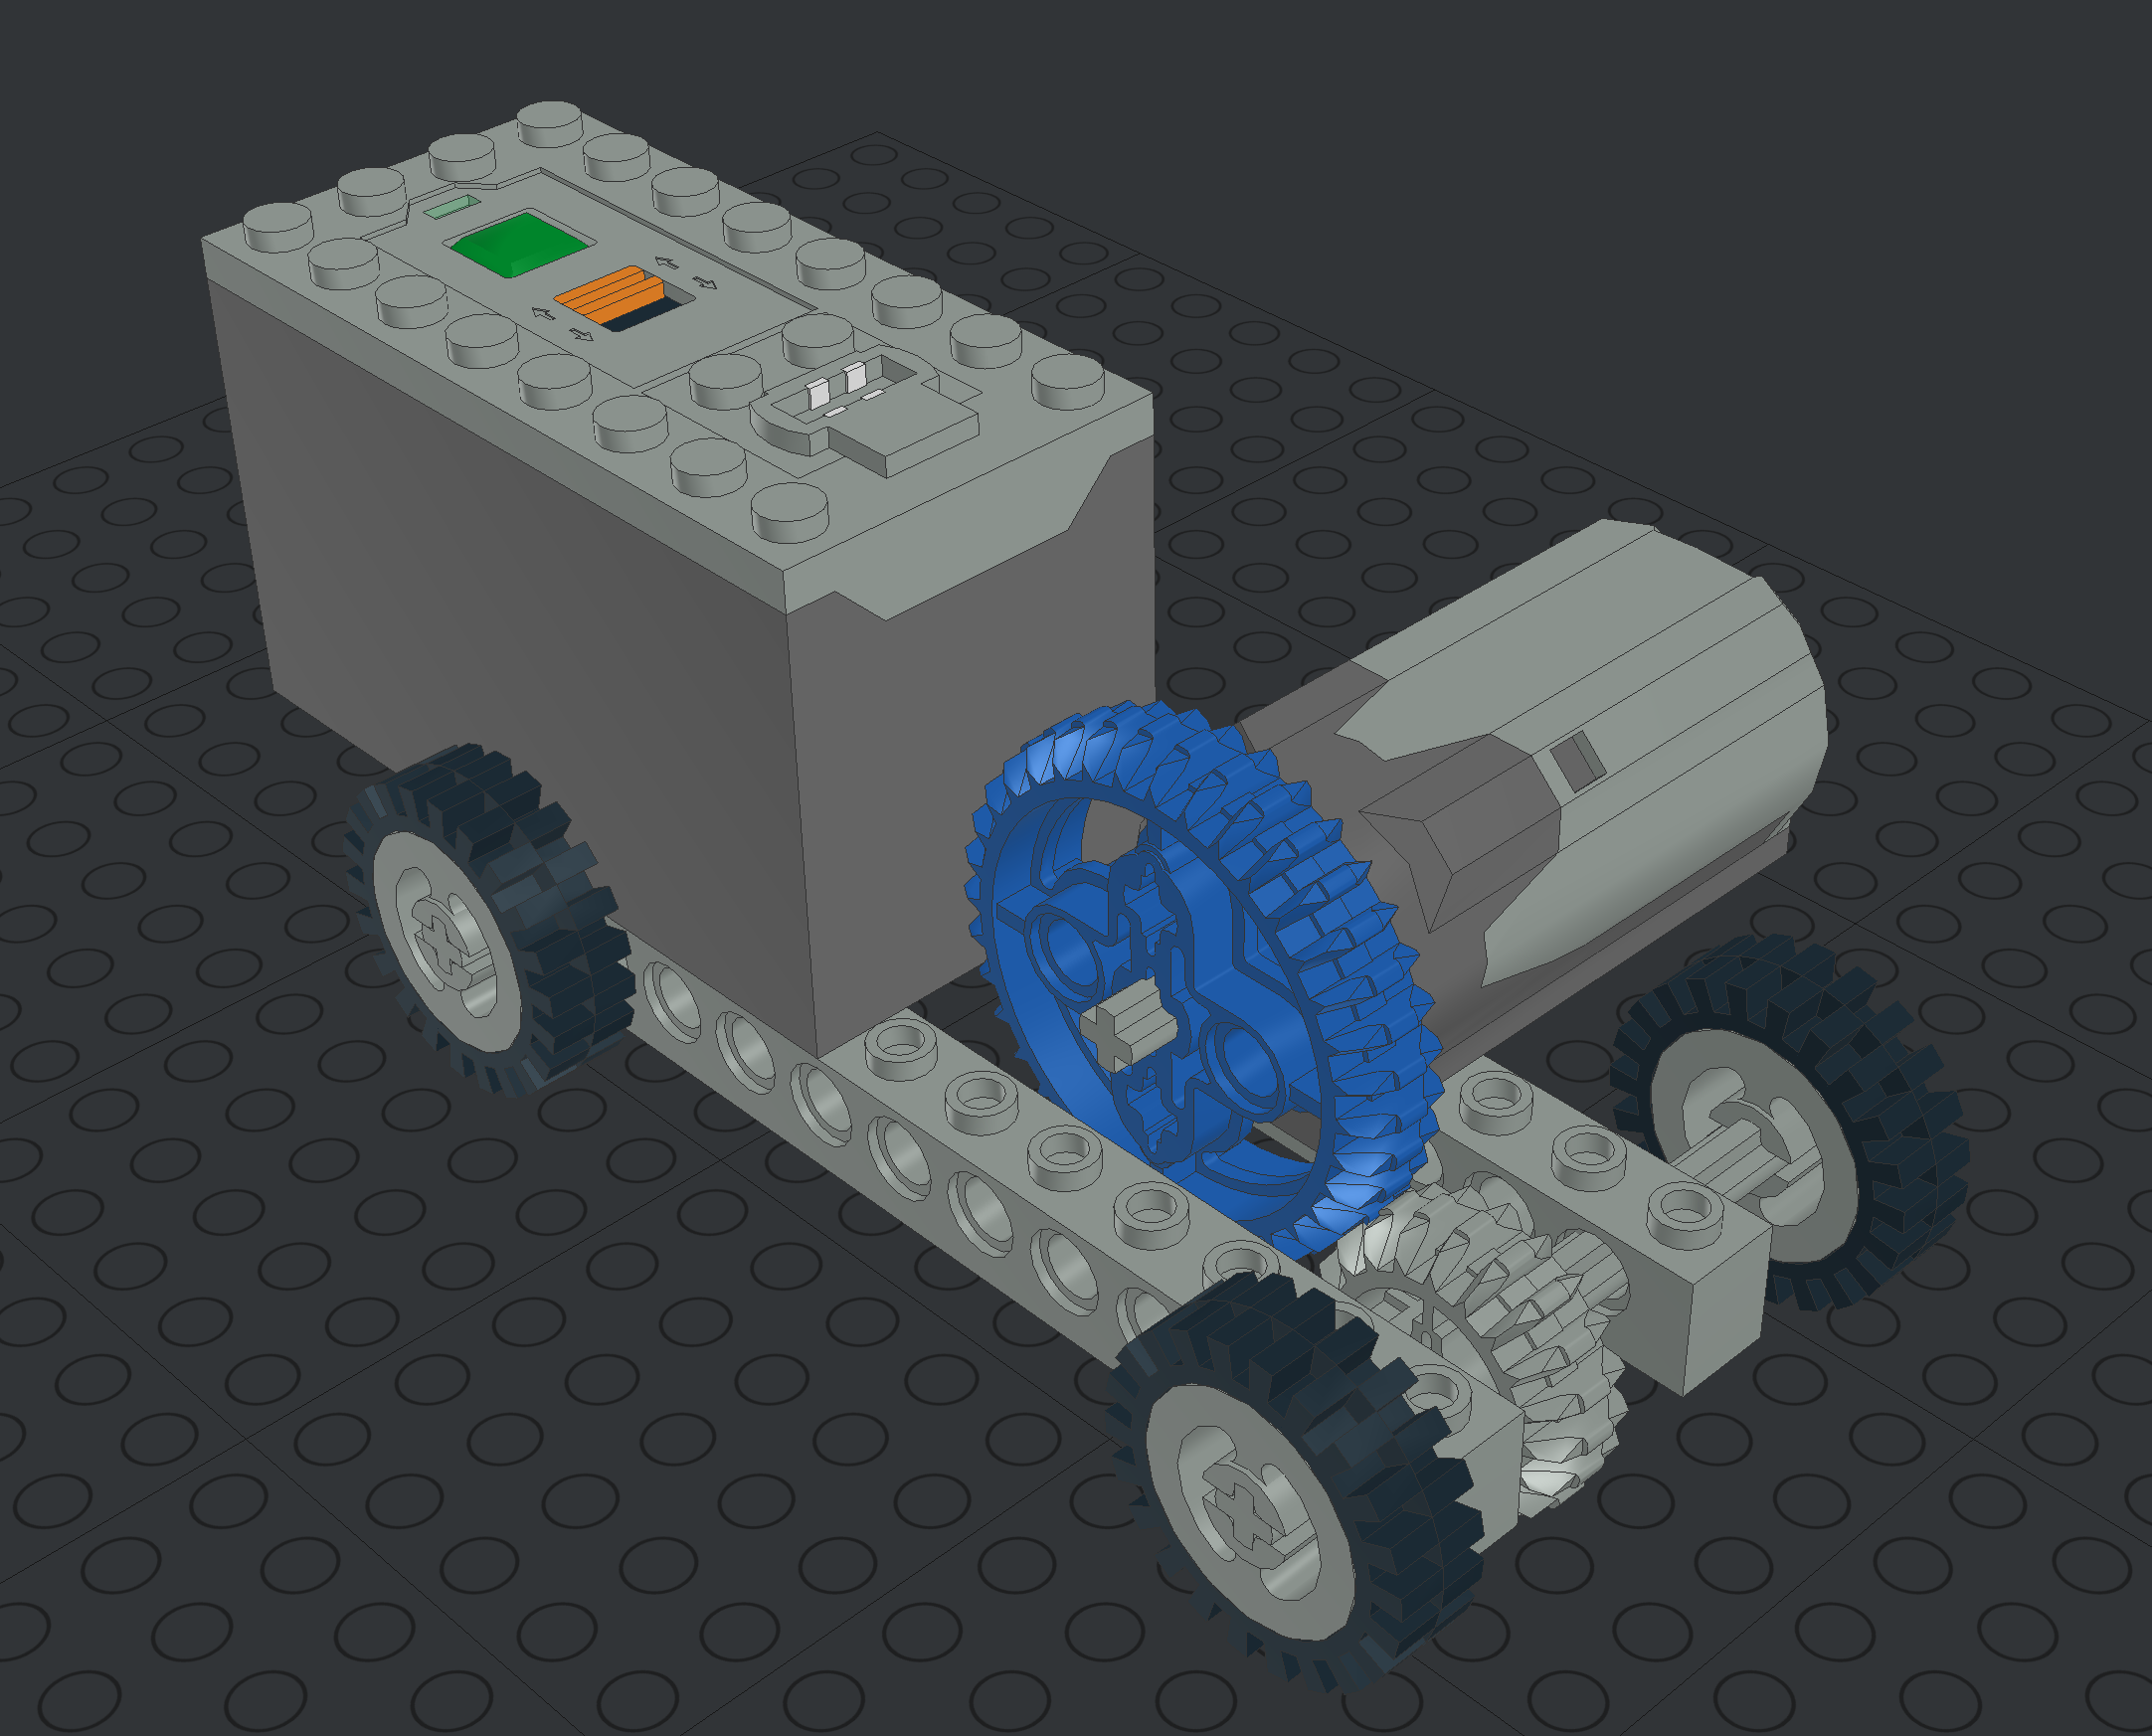

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Quasi das selbe Fahrzeug, wie oben auch, allerdings mit kürzeren Achsen und einem kürzeren Achsenabstand, sodass die Klötze für das Chasis kürzer sein können. insgesamt ist damit das Fahrzeug kleiner und somit auch leichter.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [24]:

# initialize components
#Create the wheels and axles as single components
#create first axle
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
print(axles["44294"])
front_axle2 = LegoComponent("front axle2", axles["44294"])
print(front_axle2.properties["label"])
front_axle2.properties["color"] = "grey"

# Create the second axle
back_axle2 = LegoComponent()
back_axle2.properties["label"] = "back axle2"
back_axle2.properties.update(axles["44294"])

back_axle2.properties["color"] = "grey"
pprint.pprint(back_axle2.properties)

#Create wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_wheel_right2 = LegoComponent("front wheel right2", wheels["3482c01"])
pprint.pprint(front_wheel_right2.properties)

# We included a clone function to both Lego classes, so you can easily
# create duplicate objects. Passing the new label is optional
back_wheel_right2 = front_wheel_right2.clone("back wheel right2")
back_wheel_left2 = front_wheel_right2.clone("back wheel left2")
front_wheel_left2 = front_wheel_right2.clone("front wheel left2")

#create electric
with open("datasheets/motors.json") as json_file:
    electric = json.load(json_file)
    
engine2 = LegoComponent("engine2", electric["8883-1"])
pprint.pprint(engine2.properties)
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
battery2 = LegoComponent("battery2", batteries["88000-1"])
pprint.pprint(battery2.properties)

#technic
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
    
frame_right2 = LegoComponent("frame_right2", frame["3895"])
pprint.pprint(frame_right2.properties)
frame_left2 = frame_right2.clone("frame_left2")

with open("datasheets/gears.json") as json_file:
    gear = json.load(json_file)
gear_axle2 = LegoComponent("gear_axle", gear["32269"])
pprint.pprint(gear_axle.properties)
gear_engine2 = LegoComponent("gear_engine", gear["32498"], {"color":"blue"})
pprint.pprint(gear_engine.properties)
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
axle_engine2 = LegoComponent("axle_engine", axles["32073"])
pprint.pprint(axle_engine.properties)

{'item number': 44294, 'item description': 'Axle 7 studs', 'category': 'axle', 'price [Euro]': 0.01, 'mass [g]': 1.05, 'delivery time [days]': 3, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=44294#T=S&O={%22iconly%22:0}', 'dimension [studs]': 7}
front axle2
{'category': 'axle',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=44294#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 7,
 'item description': 'Axle 7 studs',
 'item number': 44294,
 'label': 'back axle2',
 'mass [g]': 1.05,
 'price [Euro]': 0.01}
{'category': 'wheel',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3482c01#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 24.0,
 'item description': 'wheel 24',
 'item number': '3482c01',
 'label': 'front wheel right2',
 'mass [g]': 3.0,
 'price [Euro]': 0.01,
 'related items': 3483}
{'category': 'motor',
 'compatible battery': '8881, 8878, 45517, 88000',
 '

In [25]:
# set properties

In [26]:
# aggregate components
#front_wheel
front_wheel_assembly2 = LegoAssembly(AggregationLayer.SUBASSEMBLY, "front wheel assembly2", assembly_method="stick together like lego blocks")
front_wheel_assembly2.add([front_wheel_right2, gear_axle2, front_axle2, front_wheel_left2])
#back_wheel
back_wheel_assembly2 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel assembly2"
    )
back_wheel_assembly2.add([back_wheel_right2, back_axle2, back_wheel_left2])
#chasis
chasis_assembly2 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "chasis assembly2"
    )
chasis_assembly2.add([frame_right2, front_wheel_assembly2, back_wheel_assembly2, frame_left2])
#gear
gear_assembly2 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "gear assembly2"
    )
gear_assembly2.add([axle_engine2, gear_engine2])
#drivetrain
drivetrain_assembly2 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "drivetrain assembly2"
    )
drivetrain_assembly2.add([engine, gear_assembly2])

#assembly
car2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "scooter",
    manufacturer="FST",
    comment="Faster! Harder! Car!",
)
car2.add([chasis_assembly2, drivetrain_assembly2, battery2])
print(car2.get_component_list())

[LegoComponent battery2 [50e44769-7dff-447c-8f62-e850903e926d], LegoComponent frame_right2 [37adc76f-ef6e-4744-880e-2092ad2a6bbb], LegoComponent frame_left2 [04543dad-f694-4a55-a3bd-4130cffd9fa1], LegoComponent front wheel right2 [e303eee1-d068-4f5d-8bbf-344eb1efdf2d], LegoComponent gear_axle [0f4f75f3-1294-49e1-9c15-a61c468af7f6], LegoComponent front axle2 [fe62101a-db5c-4785-991f-22c90deb3dae], LegoComponent front wheel left2 [3e2e0c33-1bd1-4e71-819b-b52c9f237f68], LegoComponent back wheel right2 [0819dffc-c728-421e-b2fc-308b2b09c979], LegoComponent back axle2 [c748894f-77e0-4bff-b955-9cebf00e3921], LegoComponent back wheel left2 [a7088fcc-6e57-4c86-987a-baff9933bfba], LegoComponent engine [85541dac-b101-4560-ac7c-a64eb75c1ece], LegoComponent axle_engine [0ecb51a0-bad8-4115-986b-b55a434bb559], LegoComponent gear_engine [73ed3ba8-5200-44a7-ae0c-e165952c4e55]]


### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [27]:
# calculate the KPIs for your car
# test the import
calculation_rules.test_function()
#calculate KPIs
total_mass2 = calculation_rules.kpi_mass(car2)
print("Gesamtmasse: ", total_mass2, "g")
car2.properties["mass [g]"] = total_mass2

total_price2 = calculation_rules.kpi_price(car2)
print("Gesamtpreis: ", total_price2, "Euro")
car2.properties["price [Euro]"] = total_price2

total_delivery_time2 = calculation_rules.kpi_delivery_time(car2)
print("Lieferzeit ", total_delivery_time2, "Tage")
car2.properties["delivery time [days]"] = total_delivery_time2

You called the test function.
Gesamtmasse:  160.29999999999998 g
Gesamtpreis:  51.36100000000001 Euro
Lieferzeit  13 Tage


In [28]:
# print your KPIs

Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [29]:
# export car and its properties
with open("car2.json", "w") as fp:
    json.dump(car2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

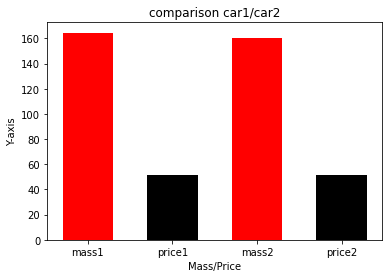

In [30]:
# plot the data, save diagramm as svg-file
import matplotlib.pyplot as plt

left_coordinates=[1,2,3,4]
heights=[total_mass,total_price,total_mass2,total_price2]
bar_labels=['mass1','price1','mass2','price2']
plt.bar(left_coordinates,heights,tick_label=bar_labels,width=0.6,color=['red','black'])
plt.xlabel('Mass/Price')
plt.ylabel('Y-axis')
plt.title("comparison car1/car2")
plt.show()

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Das zweite Fahrzeug ist 4Gramm leichter, als das erste. Außerdem ist es 8cent günstiger. An der Lieferzeit verändert sich wie erwartet nichts.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

durch die Gewichtersparnis, werden Rohstoffe und somit auch kosten gespart.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?